# 非線形回帰モデル

- 曲線で予測する

## 回帰で扱うデータ

- 入力（各要素を説明変数または特徴量と呼ぶ） \
m次元のベクトル（$m=1$の場合はスカラー）
\begin{aligned}
\mathbf{x}
  &=
  \left(
    \begin{array}{cccc}
      x_1 & x_2 & \ldots & x_m
    \end{array}
  \right)^T \in \mathbb{R}^m \\[8px]
\end{aligned}

- 出力（目的変数） \
スカラー値
\begin{aligned}
 y \in \mathbb{R}^1
\end{aligned}

※$\mathbb{R}$は、実数全体を表す。 \
※$\mathbb{R}^m$は、m次元の実数である。

# ハンズオン

In [1]:
import numpy as np
# 回帰分析
from sklearn.linear_model import LinearRegression
# ボストンの住宅情報
from sklearn.datasets import load_boston
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns

In [2]:
boston = load_boston()
# ボストンの家賃のデータの各項目
## CRIM		町ごとの一人当たりの犯罪率
## ZN		宅地の比率が25,000平方フィートを超える敷地に区画されている。
## INDUS	町当たりの非小売業エーカーの割合
## CHAS		チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0）
## NOX		一酸化窒素濃度（1000万分の1）
## RM		1住戸あたりの平均部屋数
## AGE		1940年以前に建設された所有占有ユニットの年齢比率
## DIS		5つのボストンの雇用センターまでの加重距離
## RAD		ラジアルハイウェイへのアクセス可能性の指標
## TAX		10,000ドルあたりの税全額固定資産税率
## PTRATIO	生徒教師の比率
## B		町における黒人の割合
## LSTAT	人口当たり地位が低い率
## MEDV		1000ドルでの所有者居住住宅の中央値

# ボストンの家賃のデータを表形式で表示
df=pd.DataFrame(boston.data ,columns=boston.feature_names)
x=df
x.head()

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 相関係数の算出、描画

In [7]:
# 相関係数の算出 (０は相関がない、１・－１のどちらかに近づけば相関がある)
df_chk=df
df_chk['TARGET']=boston.target
df_chk.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


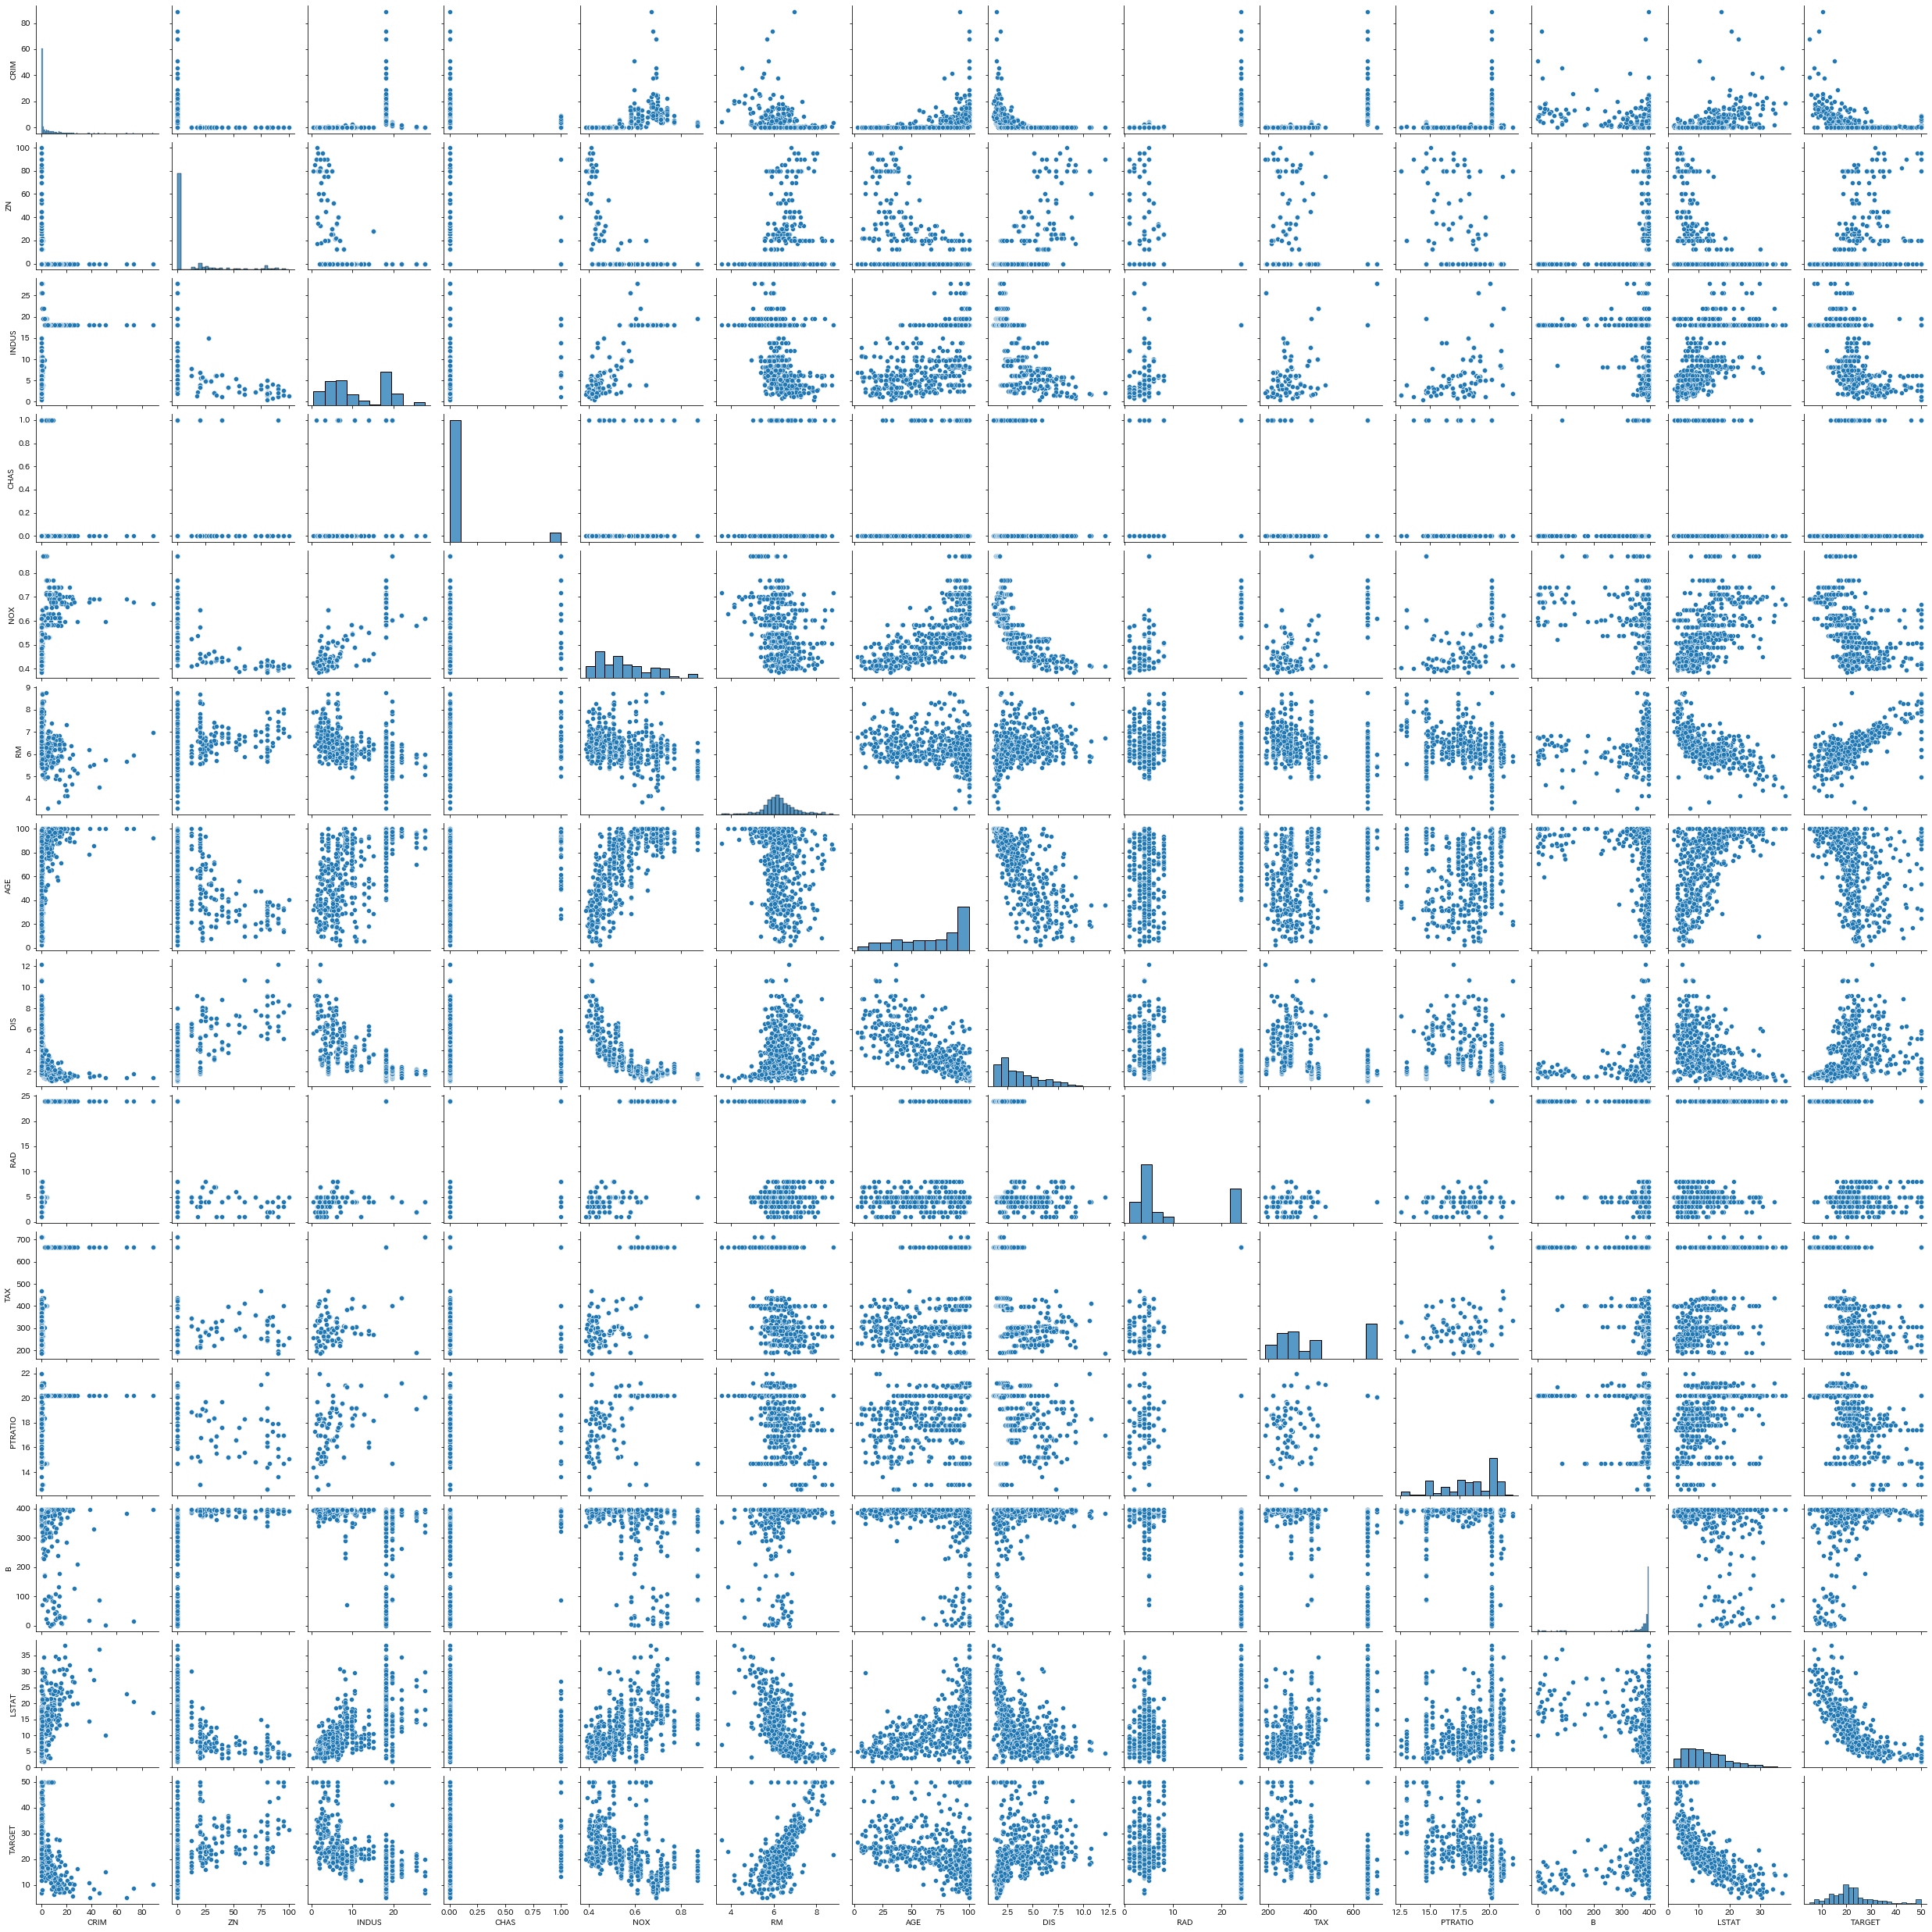

In [8]:
#ペアプロット図
# 相関関係を目視で確認
sns.pairplot(df_chk)

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

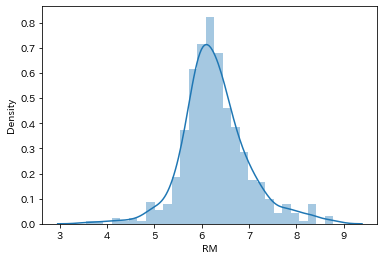

In [9]:
# 分布の確認　（正規分布となっていることを確認）
sns.distplot(df['RM'])

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIS', ylabel='Density'>

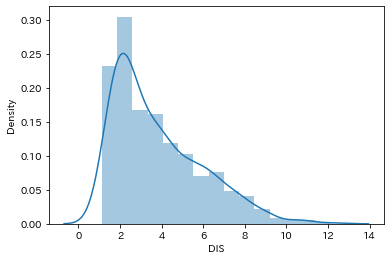

In [14]:
# 分布の確認　（正規分布となっていることを確認）
sns.distplot(df['DIS'])